In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import regex as re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
import csv
import langid
from chardet import detect
from spellchecker import SpellChecker
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [2]:
dataset = pd.read_csv('youtube_comments.csv')

In [3]:
dataset.head()

,text
0,"Hey Goodhumans, we hope you enjoy this episode..."
1,I feel like they should've found a girl who we...
2,Men’s rights vs feminism vs Derrick\n\nYou dec...
3,the other guys were probably like “godamn derr...
4,the fact that derrick was raised by a single m...


In [4]:
dataset.shape

(10000, 1)

In [5]:
dataset.dtypes

text    object
dtype: object

In [6]:
dataset.describe()

,text
count,10000
unique,9688
top,Yes
freq,17


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [8]:
dataset.isna().sum()

text    0
dtype: int64

# Data Preprocessing

In [9]:
#Double check for duplicates

print("Duplicate Comments:", len(dataset['text'])-len(dataset['text'].drop_duplicates()))

Duplicate Comments: 312


In [10]:
#Dropping of Duplicates and Reset of Index
dupes = dataset["text"]
dupes_listed = dataset[dupes.isin(dupes[dupes.duplicated()])].sort_values("text")
dataset.drop_duplicates(subset='text', keep="first", inplace=True)
dataset = dataset.reset_index()
dataset.drop(['index'], axis=1, inplace=True)
dataset

,text
0,"Hey Goodhumans, we hope you enjoy this episode..."
1,I feel like they should've found a girl who we...
2,Men’s rights vs feminism vs Derrick\n\nYou dec...
3,the other guys were probably like “godamn derr...
4,the fact that derrick was raised by a single m...
...,...
9683,@gsGs-xb6um What do you think toxic masculin...
9684,me when i lie
9685,@lesdaisydoo what
9686,He’s “incelcure” 😂


In [11]:
#Remove text that start with @ / These are youtube usernames
def remove_usernames(text):
    words = text.split()
    
    filtered_words = [word for word in words if not word.startswith('@')]
    
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text


dataset['text'] = dataset['text'].apply(remove_usernames)

In [16]:
#Remove non-alphanumeric characters, spaces & links
def clean_text(text):
    text = text.replace('?', ' ').replace('!', ' ').replace('_', ' ') # Remove question marks, exclamation points, underscores
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # Remove mention tags
    text = text.replace('\n', ' ') # Remove newline characters

    # Remove all non-alphanumeric characters except hashtags, underscores, and spaces
    text = re.sub(r'[^a-zA-Z0-9_#\s]', '', text)
    
    text = text.replace('...', ' ') # Remove ellipses
    text = ' '.join(text.split()) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing spaces
    return text

dataset['text'] = dataset['text'].apply(clean_text)
print(dataset)

                                                   text
0     Hey Goodhumans we hope you enjoy this episode ...
1     I feel like they shouldve found a girl who wen...
2         Mens rights vs feminism vs Derrick You decide
3     the other guys were probably like godamn derri...
4     the fact that derrick was raised by a single m...
...                                                 ...
9683      What do you think toxic masculinity refers to
9684                                      me when i lie
9685                                               what
9686                                      Hes incelcure
9687                            Provide an example then

[9688 rows x 1 columns]


In [17]:
#Check for Duplicate Tweets after cleaning of non-alphanumeric characters, spaces & links
print("Duplicate Tweets:", len(dataset['text'])-len(dataset['text'].drop_duplicates()))

Duplicate Tweets: 298


In [18]:
dupes_2 = dataset["text"]
dupes_listed2 = dataset[dupes_2.isin(dupes_2[dupes_2.duplicated()])].sort_values("text")
print(dupes_listed2)

              text
8226              
3140              
8135              
2852              
8256              
...            ...
721   yes they can
6867  yes they can
7620         yikes
7619         yikes
1558         yikes

[419 rows x 1 columns]


In [15]:
# Duplicate tweets presented above were actually blank text
# Drop the blank rows

index_to_drop = [161,188]
dataset.drop(index_to_drop, inplace=True)

print(dataset)

                                                  text
0    Hey Goodhumans we hope you enjoy this episode ...
1    I feel like they shouldve found a girl who wen...
2        Mens rights vs feminism vs Derrick You decide
3    The comment section Feminism 0 Mens Actvist 0 ...
4    the fact that derrick was raised by a single m...
..                                                 ...
495                                          incorrect
496  Just to clear this up Feminists dont hate men ...
497             Ari Mijangos Ruiz Yes they can sweetie
498        Bengiamino do you know what a feminists are
499  Problem is these feminist are speaking for you...

[498 rows x 1 columns]


In [ ]:
# Drop duplicate tweets

In [16]:
# Reset column index

dataset = dataset.reset_index()

In [17]:
# Drop old index column 
dataset.drop(['index'], axis=1, inplace=True)
dataset

,text
0,Hey Goodhumans we hope you enjoy this episode ...
1,I feel like they shouldve found a girl who wen...
2,Mens rights vs feminism vs Derrick You decide
3,The comment section Feminism 0 Mens Actvist 0 ...
4,the fact that derrick was raised by a single m...
...,...
493,incorrect
494,Just to clear this up Feminists dont hate men ...
495,Ari Mijangos Ruiz Yes they can sweetie
496,Bengiamino do you know what a feminists are


In [18]:
# Detect language used / Drop if it is not in English

from langdetect import detect

def keep_eng(df, column):

    def is_english(text):
        try:
            return detect(text) == 'en'
        except:
            return False

    df['is_english'] = df[column].apply(is_english)
    english_df = df[df['is_english']]
    english_df.drop(columns=['is_english'], inplace=True)
    return english_df

english_text = keep_eng(dataset,'text')

C:\Users\casti\AppData\Local\Temp\ipykernel_15128\1600254544.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df.drop(columns=['is_english'], inplace=True)


In [19]:
print(english_text)

                                                  text
0    Hey Goodhumans we hope you enjoy this episode ...
1    I feel like they shouldve found a girl who wen...
3    The comment section Feminism 0 Mens Actvist 0 ...
4    the fact that derrick was raised by a single m...
5    I cant believe Men and woman are different but...
..                                                 ...
493                                          incorrect
494  Just to clear this up Feminists dont hate men ...
495             Ari Mijangos Ruiz Yes they can sweetie
496        Bengiamino do you know what a feminists are
497  Problem is these feminist are speaking for you...

[456 rows x 1 columns]


In [20]:
# Reset and drop old column
english_text = english_text.reset_index()
english_text.drop(['index'], axis=1, inplace=True)
english_text

,text
0,Hey Goodhumans we hope you enjoy this episode ...
1,I feel like they shouldve found a girl who wen...
2,The comment section Feminism 0 Mens Actvist 0 ...
3,the fact that derrick was raised by a single m...
4,I cant believe Men and woman are different but...
...,...
451,incorrect
452,Just to clear this up Feminists dont hate men ...
453,Ari Mijangos Ruiz Yes they can sweetie
454,Bengiamino do you know what a feminists are


In [21]:
#Tokenization

english_text['Tokenized_Comments'] = english_text['text'].apply(lambda x: word_tokenize(x))

english_text['Tokenized_Comments']

0      [Hey, Goodhumans, we, hope, you, enjoy, this, ...
1      [I, feel, like, they, shouldve, found, a, girl...
2      [The, comment, section, Feminism, 0, Mens, Act...
3      [the, fact, that, derrick, was, raised, by, a,...
4      [I, cant, believe, Men, and, woman, are, diffe...
                             ...                        
451                                          [incorrect]
452    [Just, to, clear, this, up, Feminists, dont, h...
453       [Ari, Mijangos, Ruiz, Yes, they, can, sweetie]
454    [Bengiamino, do, you, know, what, a, feminists...
455    [Problem, is, these, feminist, are, speaking, ...
Name: Tokenized_Comments, Length: 456, dtype: object

In [22]:
# Case Transformation
# Function to transform tokenized tweets to lowercase
def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

english_text['Tokenized_Comments'] = english_text['Tokenized_Comments'].apply(lambda x: lowercase_tokens(x))
print(english_text['Tokenized_Comments'])

0      [hey, goodhumans, we, hope, you, enjoy, this, ...
1      [i, feel, like, they, shouldve, found, a, girl...
2      [the, comment, section, feminism, 0, mens, act...
3      [the, fact, that, derrick, was, raised, by, a,...
4      [i, cant, believe, men, and, woman, are, diffe...
                             ...                        
451                                          [incorrect]
452    [just, to, clear, this, up, feminists, dont, h...
453       [ari, mijangos, ruiz, yes, they, can, sweetie]
454    [bengiamino, do, you, know, what, a, feminists...
455    [problem, is, these, feminist, are, speaking, ...
Name: Tokenized_Comments, Length: 456, dtype: object


In [27]:
#Check Spelling

def check_spelling(tokens):
    spell = SpellChecker()
    corrected_tokens = []
    for token in tokens:
        # Check if the token is misspelled
        if spell.unknown([token]):
            corrected_token = spell.correction(token)
            if corrected_token is not None and corrected_token.strip():  # Check if corrected_token is not None
                corrected_tokens.append(corrected_token.strip())  # Append the corrected token
        else:
            corrected_tokens.append(token)  # Keep the original token if it's not misspelled
    return corrected_tokens

english_text['corrected_tokens'] = english_text['Tokenized_Comments'].apply(check_spelling)
print(english_text)


                                                  text  \
0    Hey Goodhumans we hope you enjoy this episode ...   
1    I feel like they shouldve found a girl who wen...   
2    The comment section Feminism 0 Mens Actvist 0 ...   
3    the fact that derrick was raised by a single m...   
4    I cant believe Men and woman are different but...   
..                                                 ...   
451                                          incorrect   
452  Just to clear this up Feminists dont hate men ...   
453             Ari Mijangos Ruiz Yes they can sweetie   
454        Bengiamino do you know what a feminists are   
455  Problem is these feminist are speaking for you...   

                                    Tokenized_Comments  \
0    [hey, goodhumans, we, hope, you, enjoy, this, ...   
1    [i, feel, like, they, shouldve, found, a, girl...   
2    [the, comment, section, feminism, 0, mens, act...   
3    [the, fact, that, derrick, was, raised, by, a,...   
4    [i, cant

In [28]:
# Get the total number of Ordinal Values
import re

def count_ordinals_in_tokens(tokens):
    ordinal_pattern = r'\d+(st|nd|rd|th)'
    ordinals = [match for token in tokens for match in re.findall(ordinal_pattern, token)]
    return len(ordinals)
cor_tokens = [token for tokens in english_text["corrected_tokens"] for token in tokens]

total_ordinal_count = count_ordinals_in_tokens(cor_tokens)
print(f"Total Count of Ordinals in 'corrected_tokens' Column: {total_ordinal_count}")

Total Count of Ordinals in 'corrected_tokens' Column: 0


In [45]:
# Remove Stopwords
stopwords_df = pd.read_csv('stopwords.csv')
combined_stopwords = set(stopwords_df['Stopword'])

filtered_word_lists = []

for tokens in english_text['corrected_tokens']:
    if isinstance(tokens,list):
        filtered_tokens = [word for word in tokens if word not in combined_stopwords]
        filtered_word_lists.append(filtered_tokens)
    else:
        filtered_word_lists.append([])

english_text['corrected_tokens'] = filtered_word_lists


In [46]:
# Remove Numbers

def remove_numbers_and_blank_spaces(tokens):
    number_pattern = r'\d+'
    tokens_without_numbers = []
    
    for token in tokens:
        token_without_numbers = re.sub(number_pattern, '', token).strip()
        if token_without_numbers:
            tokens_without_numbers.append(token_without_numbers)
    
    return tokens_without_numbers

In [47]:
#Lemmatization

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(text):
    # Apply lemmatization
    lemmatized_tokens = lemmatize_tokens(text)
    
    # Remove numbers and hashtags
    tokens_without_numbers = remove_numbers_and_blank_spaces(lemmatized_tokens)
    
    cleaned_text = ', '.join(tokens_without_numbers)
    
    return cleaned_text

english_text['corrected_tokens'] = english_text['corrected_tokens'].apply(preprocess_text)
print(english_text['corrected_tokens'])

0      hey, hope, enjoy, episode, hope, spark, meanin...
1             feel, shouldve, girl, men, right, feminist
2              comment, feminism, men, activist, derrick
3      derrick, raised, single, mother, acted, genuin...
4          woman, equal, actual, prompt, basic, humanity
                             ...                        
451                                            incorrect
452    feminist, hate, woman, treated, equally, gende...
453                            ari, mango, ruiz, sweetie
454                                             feminist
455    feminist, speaking, fight, female, right, femi...
Name: corrected_tokens, Length: 456, dtype: object


In [48]:
#Remove whitespaces from Corrected Words Column
english_text['corrected_tokens'] = english_text['corrected_tokens'].str.strip()
english_text

,text,Tokenized_Comments,corrected_tokens
0,Hey Goodhumans we hope you enjoy this episode ...,"[hey, goodhumans, we, hope, you, enjoy, this, ...","hey, hope, enjoy, episode, hope, spark, meanin..."
1,I feel like they shouldve found a girl who wen...,"[i, feel, like, they, shouldve, found, a, girl...","feel, shouldve, girl, men, right, feminist"
2,The comment section Feminism 0 Mens Actvist 0 ...,"[the, comment, section, feminism, 0, mens, act...","comment, feminism, men, activist, derrick"
3,the fact that derrick was raised by a single m...,"[the, fact, that, derrick, was, raised, by, a,...","derrick, raised, single, mother, acted, genuin..."
4,I cant believe Men and woman are different but...,"[i, cant, believe, men, and, woman, are, diffe...","woman, equal, actual, prompt, basic, humanity"
...,...,...,...
451,incorrect,[incorrect],incorrect
452,Just to clear this up Feminists dont hate men ...,"[just, to, clear, this, up, feminists, dont, h...","feminist, hate, woman, treated, equally, gende..."
453,Ari Mijangos Ruiz Yes they can sweetie,"[ari, mijangos, ruiz, yes, they, can, sweetie]","ari, mango, ruiz, sweetie"
454,Bengiamino do you know what a feminists are,"[bengiamino, do, you, know, what, a, feminists...",feminist


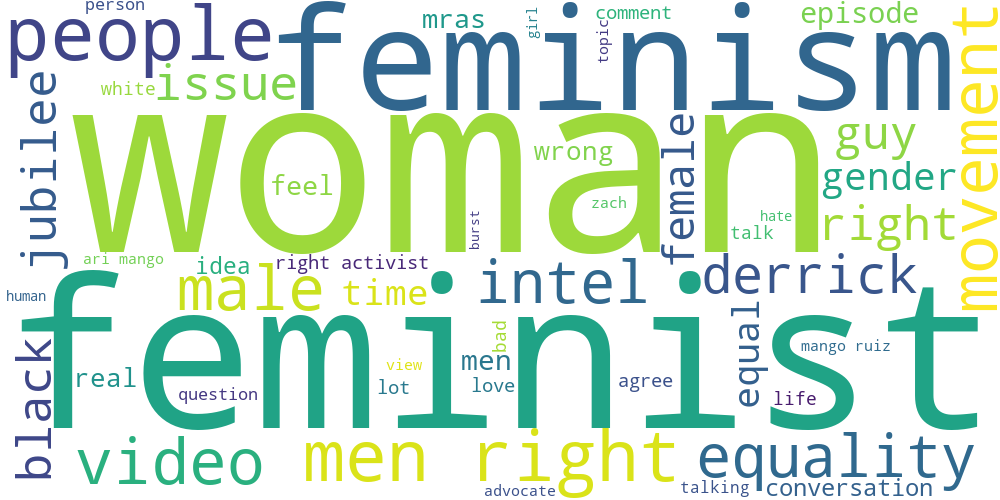

In [49]:
from wordcloud import WordCloud

long_string = ','.join(list(english_text['corrected_tokens'].values))
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',width=1000, height=500)
wordcloud.generate(long_string)
wordcloud.to_image()

# Sentiment Analysis

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_scores(tokens):
    if not tokens:
        return 0.0

    total_score = 0
    for token in tokens:
        score = analyzer.polarity_scores(token)["compound"]
        total_score += score
    avg_score = total_score / len(tokens)
    return avg_score

english_text['Sentiment_Scores'] = english_text['corrected_tokens'].apply(sentiment_scores)
print(english_text['Sentiment_Scores'])

0      0.017922
1      0.032771
2      0.000000
3      0.016993
4      0.020391
         ...   
451    0.000000
452    0.016098
453    0.000000
454    0.000000
455    0.008049
Name: Sentiment_Scores, Length: 456, dtype: float64


In [56]:
def sentiment_label(score):
    if score > 0:
        label = "Positive"
    elif score < 0:
        label = "Negative"
    else:
        label = "Neutral"
    
    return label

english_text["Sentiment_Label"] = english_text["Sentiment_Scores"].apply(sentiment_label)

english_text.head()

,text,Tokenized_Comments,corrected_tokens,Sentiment_Scores,Sentiment_Label
0,Hey Goodhumans we hope you enjoy this episode ...,"[hey, goodhumans, we, hope, you, enjoy, this, ...","hey, hope, enjoy, episode, hope, spark, meanin...",0.017922,Positive
1,I feel like they shouldve found a girl who wen...,"[i, feel, like, they, shouldve, found, a, girl...","feel, shouldve, girl, men, right, feminist",0.032771,Positive
2,The comment section Feminism 0 Mens Actvist 0 ...,"[the, comment, section, feminism, 0, mens, act...","comment, feminism, men, activist, derrick",0.000000,Neutral
3,the fact that derrick was raised by a single m...,"[the, fact, that, derrick, was, raised, by, a,...","derrick, raised, single, mother, acted, genuin...",0.016993,Positive
4,I cant believe Men and woman are different but...,"[i, cant, believe, men, and, woman, are, diffe...","woman, equal, actual, prompt, basic, humanity",0.020391,Positive


# Visualization

In [67]:
sentiment_count = english_text['Sentiment_Label'].value_counts()
colors = {'Positive':'lightgreen','Neutral':'lightgray', 'Negative':'lightcoral'}
print(sentiment_count)

Sentiment_Label
Positive    361
Neutral      95
Name: count, dtype: int64
